# Classification_Task_Flower_ Classification_VGG19

**Checking System Config**

In [ ]:
%cat /etc/lsb-release

DISTRIB_ID=Ubuntu
DISTRIB_RELEASE=18.04
DISTRIB_CODENAME=bionic
DISTRIB_DESCRIPTION="Ubuntu 18.04.6 LTS"


**Update Repositries**

In [ ]:
!apt-get update

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1,581 B]
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:6 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages [902 kB]
Get:8 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease [15.9 kB]
Get:10 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:11 http://security.ubuntu.com/ubuntu bionic-security/main amd64 Packages [2,905 kB]
Get:12 http://security.ubuntu.com/ubuntu bionic-security/universe amd64 Packages [1,528 kB]
Hit:13 http://p

In [ ]:
%cd /content/drive/My Drive/DL

[Errno 2] No such file or directory: '/content/drive/My Drive/DL'
/content


In [ ]:
!unzip Flowers_Manual.zip

In [ ]:
%pwd

'/content'

In [ ]:
%cd /content/drive/MyDrive/DL/Flowers_Manual/

/content/drive/MyDrive/DL/Flowers_Manual


## Libraries

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg19 import VGG19,decode_predictions,preprocess_input
from tensorflow.keras.models import Model
from keras import layers

## Mode

In [ ]:
Train_dataGen = ImageDataGenerator(rescale=1/255,rotation_range=20,horizontal_flip=True,width_shift_range=0.2,
    height_shift_range=0.2)
Test_dataGen =ImageDataGenerator(rescale=1/255)

model=VGG19(include_top=False,input_shape=(224,224,3))

for layer in model.layers:
    layer.trainable=False

flatten_layer= layers.Flatten()(model.output)

fC_layer= layers.Dense(512,activation='relu')(flatten_layer)
fC_softmax_layer= layers.Dense(5,activation='softmax')(fC_layer)

model= Model(inputs=model.input,outputs=fC_softmax_layer)

In [ ]:
train_itt =Train_dataGen.flow_from_directory('Train',
                                             batch_size=64,target_size=(224,224))

test_itt = Test_dataGen.flow_from_directory('Test',
                                            batch_size=64,target_size=(224,224))

Found 3735 images belonging to 5 classes.
Found 1199 images belonging to 5 classes.


In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(train_itt,validation_data=test_itt,epochs=5)

Epoch 1/5
59/59 [==============================] - 1793s 30s/step - loss: 2.5043 - accuracy: 0.5580 - val_loss: 0.7354 - val_accuracy: 0.7273
Epoch 2/5
59/59 [==============================] - 69s 1s/step - loss: 0.6342 - accuracy: 0.7732 - val_loss: 0.6300 - val_accuracy: 0.7640
Epoch 3/5
59/59 [==============================] - 67s 1s/step - loss: 0.5400 - accuracy: 0.8078 - val_loss: 0.6090 - val_accuracy: 0.7698
Epoch 4/5
59/59 [==============================] - 69s 1s/step - loss: 0.5525 - accuracy: 0.8062 - val_loss: 0.5627 - val_accuracy: 0.7973
Epoch 5/5
59/59 [==============================] - 68s 1s/step - loss: 0.4415 - accuracy: 0.8369 - val_loss: 0.5762 - val_accuracy: 0.7998


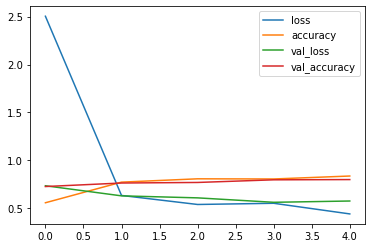

In [ ]:
losses = pd.DataFrame(model.history.history)
losses.plot()

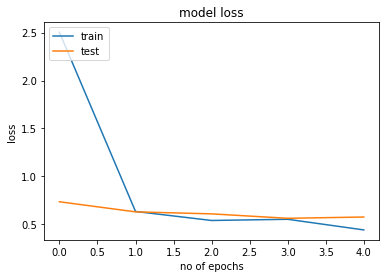

In [ ]:
plt.plot(losses['loss'])
plt.plot(losses['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('no of epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()

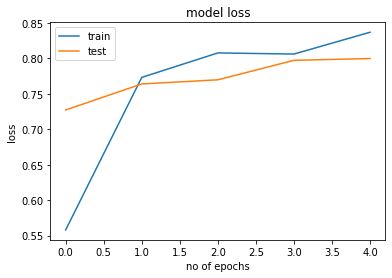

In [ ]:
plt.plot(losses['accuracy'])
plt.plot(losses['val_accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('no of epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/DL/VGG19_trained_model.h5')

## Predicting Mode

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img,img_to_array
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
model= load_model('/content/drive/MyDrive/DL/VGG19_trained_model.h5')

In [ ]:
image = load_img('/content/drive/MyDrive/DL/Images/rose.jpg',target_size=(224,224))
plt.imshow(image)
plt.show()
image= img_to_array(image)
image=image.reshape(1,224,224,3)

In [ ]:
result=model.predict(image)
class_label={'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}
result=np.argmax(result)

print([key for key in class_label][result])

tulip
